# Z-toets wijnrecensies

Onderzoeksvragen:

1. In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?
2. Komen de ingredienten van wijnen met een hoge scoren overeen met elkaar?
3. Wat is het verband tusen de ingredienten van de wijnen en de score van de regio's?

In [95]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Data collection 

In [28]:
# load dataset redwine.csv
df = pd.read_csv('redwine.csv',encoding  = "ansi", delimiter = ';')
df.head(10)


,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,...,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,...,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4
5,6,Portugal,This is a new wine from the hands of master wi...,Monte de Carrapatelo Colheita Seleccionada Tinto,92,30.0,Alentejano,Michael Schachner,Luis Duarte 2013 Monte de Carrapatelo Colheita...,Portuguese Red,...,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3
6,7,Portugal,As its name suggests this is a selection of ba...,Lagoalva Barrel Selection Tinto,92,23.0,Tejo,Kerin O’Keefe,Quinta da Lagoalva de Cima 2013 Lagoalva Barre...,Portuguese Red,...,0.47,0.43,2.1,0.171,27.0,66.0,0.9982,3.17,0.76,10.8
7,8,Portugal,"This is an impressive, powerful wine, It speak...",NaN,92,80.0,Douro,Roger Voss,Quinta do Monte Xisto 2013 Red (Douro),Portuguese Red,...,0.53,-,1.4,0.070,6.0,14.0,0.99593,3.25,0.64,10
8,9,Portugal,"Powerful and concentrated, this is just at its...",Grande Reserva,92,32.0,Alentejo,Anna Lee C. Iijima,Monte da Penha 2005 Grande Reserva Red (Alentejo),Portuguese Red,...,0.33,0.41,1.5,0.056,6.0,35.0,0.99396,3.29,0.71,11
9,10,Portugal,"This mature wine has a soft, smooth character ...",VT '08,90,32.0,Douro,Roger Voss,Quinta do Sagrado 2008 VT '08 Red (Douro),Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3


In [74]:
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [29]:
#load externe dataset 
externdf = pd.read_csv('wineQualityReds.csv', delimiter = ',')
externdf.head(10)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,6,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,8,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,10,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Data exploration en analysis

In [30]:
df.shape # er zijn 2465 rijen en 22 kolommen

(2465, 22)

In [36]:
# minimum - maximum points
print("Mininum punten " + str(df['points'].min()))
print("Maximum punten " + str(df['points'].max()))
#gemiddelde van kolom points
print("Gemiddelde punten " + str(df['points'].mean()))

Mininum punten 81
Maximum punten 100
Gemiddelde punten 88.81135902636917


In [44]:
len(df[df['points'] > 88.81135902636917]) # er zijn 1217 rijen die boven de gemiddele scoren.

1217

In [57]:
#Kijk de aantal verschillende wijnen die boven de gemiddelde scoren
len(list(set(df['title'].loc[df['points'] > 88.81135902636917])))

1136

In [58]:
list(set(df['title'].loc[df['points'] > 88.81135902636917]))

['Santos & Seixo 2015 Reserva Tinto Red (Alentejano)',
 'Fitapreta Vinhos 2007 Preta Red (Alentejano)',
 'Casa Santos Lima 2014 Al-Ria Reserva Red (Algarve)',
 'Quinta do Vale Bragão 2013 Reserva Red (Douro)',
 'DFJ Vinhos 2015 Francos Reserva Red (Lisboa)',
 'Monte da Penha 2009 Reserva Red (Alentejano)',
 'Quinta do Sagrado 2009 Grande Reserva Red (Douro)',
 'Mouchão 2012 Ponte das Canas Red (Alentejo)',
 'Quinta do Casal Branco 2012 Falcoaria Clássico Red (Tejo)',
 'Quinta do Vale Meão 2012 Red (Douro)',
 'Global Wines NV Cabriz Impar Red (Vinho Licoroso)',
 'Manuel Carvalho Martins 2015 Golpe Red (Douro)',
 "Rui Roboredo Madeira 2012 Castello d'Alba Limited Edition Red (Douro)",
 'Quinta do Casal Branco 2008 Dona Sophia Red (Tejo)',
 'Herdade do Esporão 2010 Esporão Reserva Red (Alentejano)',
 'Quinta do Passadouro 2013 Passadouro Red (Douro)',
 'Cortes de Cima 2011 Red (Alentejano)',
 'Quinta da Romaneira 2012 Reserva Red (Douro)',
 'Quinta de Foz de Arouce 2008 Red (Beiras)',
 'R

In [61]:
df.groupby(df['province'].loc[df['points'] > 88.81135902636917]).count()

,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
province,,,,,,,,,,,,,,,,,,,,,
Alenquer,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Alentejano,230,230,230,213,230,204,230,230,230,230,...,230,230,230,230,230,230,230,230,230,230
Alentejo,69,69,69,66,69,62,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
Algarve,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bairrada,34,34,34,34,34,32,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
Beira Atlantico,3,3,3,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Beira Interior,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
Beiras,5,5,5,2,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Douro,536,536,536,490,536,475,536,536,536,536,...,536,536,536,536,536,536,536,536,536,536


In [72]:
df.groupby(df['province'].loc[df['points'] > 0]).mean()['points']

province
Alenquer                 87.666667
Alentejano               88.388785
Alentejo                 89.142857
Algarve                  87.375000
Bairrada                 88.924242
Beira Atlantico          90.666667
Beira Interior           90.444444
Beiras                   91.600000
Douro                    89.681818
Duriense                 89.000000
Dão                      89.857955
Estremadura              86.583333
Lisboa                   87.785088
Minho                    89.000000
Obidos                   88.625000
Palmela                  91.000000
Península de Setúbal     87.772727
Portugal                 83.000000
Portuguese Table Wine    85.500000
Ribatejano               87.636364
Ribatejo                 88.200000
Setubal                  86.923077
Table wine               81.000000
Tejo                     87.386861
Terras do Dão            87.750000
Terras do Sado           89.750000
Trás-os-Montes           86.875000
Vinho Licoroso           93.000000
Vinho Verde

In [73]:
df.groupby(df['taster_name'].loc[df['points'] > 0]).mean()['points'] # nu zien we dat alle wijn experts ongeveer dezelfde scor heeft en daardoor unbiased zijn.

taster_name
Alexander Peartree    88.500000
Anna Lee C. Iijima    88.892857
Anne Krebiehl MW      88.090909
Carrie Dykes          85.333333
Fiona Adams           88.666667
Jeff Jenssen          87.111111
Jim Gordon            88.710280
Joe Czerwinski        88.650350
Kerin O’Keefe         88.740310
Lauren Buzzeo         88.552632
Matt Kettmann         89.057143
Michael Schachner     89.054688
Mike DeSimone         89.600000
Paul Gregutt          88.899083
Roger Voss            88.779365
Sean P. Sullivan      88.648000
Susan Kostrzewa       89.068966
Virginie Boone        88.845455
Name: points, dtype: float64

In [116]:
# de verschil van de gemiddelde ingredienten per provincie.
df.groupby('province')[['fixed acidity']].mean()

,fixed acidity
province,
Alenquer,8.333333
Alentejano,8.394766
Alentejo,8.106349
Algarve,8.400000
Bairrada,8.127273
Beira Atlantico,7.266667
Beira Interior,8.505556
Beiras,9.580000
Douro,8.381705


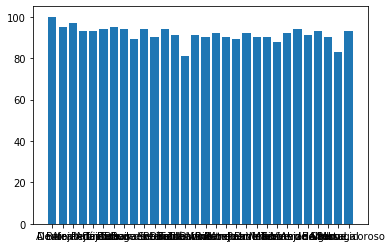

In [122]:
#Visualiseren in een barchart.
xb = df['province'] 
yb = df['points']
plt.bar(xb,yb)
plt.show()